# 3. Neural Network I/O

여기서부터 재미있어지는 내용! 신경망의 학습-!

토큰들이 시퀀스 내에서 서로 어떤 통계적인 관계를 갖는지에 대해서 모델링을 해보고자 함.

이 토큰 시퀀스 내에서 임의의 길이의 토큰 (~토큰 윈도우, ~토큰 길이, ~시퀀스 길이)을 0에서 시작해서 4000,8000,16000과 같은 최대값을 지정해야 함.

이 예시에서는 4개의 토큰 인풋이라고 가정하자. 여기서의, 아웃풋은 모든 100.277개의 토큰에 대해서 다음에 나타날 확률을 의미하고, 최초로 셋팅된 확률은 아래와 같이 4%, 2%,...3% 와 같이 랜덤한 확률분포로 설정됨.

이 시퀀스에서, 다음에 와야하는 토큰은 3962(" Post")라는 정답이기 때문에,

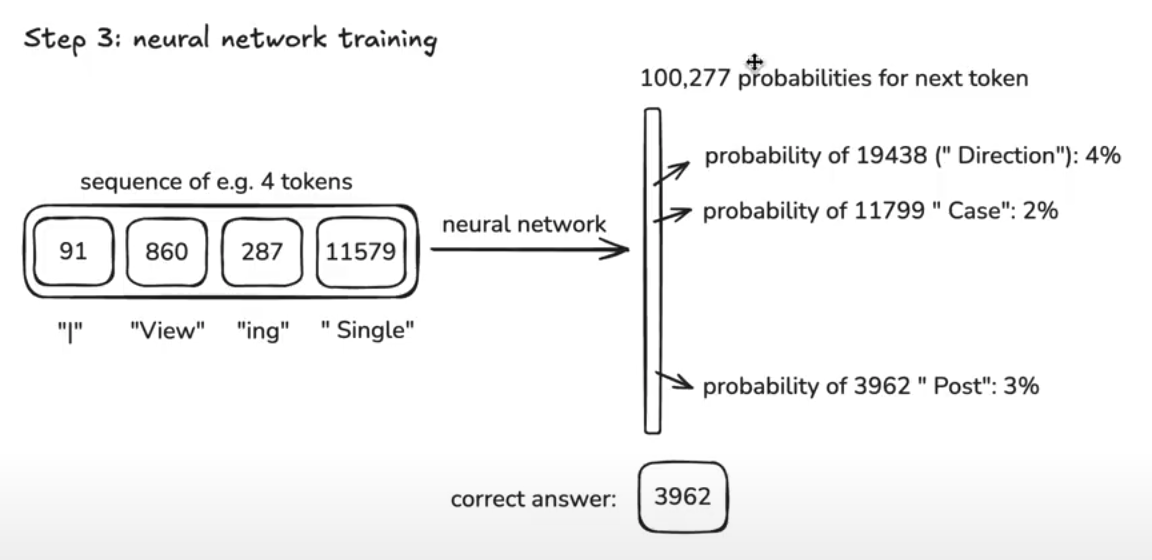

학습을 거치는 과정에서 조금씩 Post가 노출될 확률이 높아지고, (3%에서 4%로) 다른 확률은 상대적으로 낮아지게 nudging하는 과정을 반복.

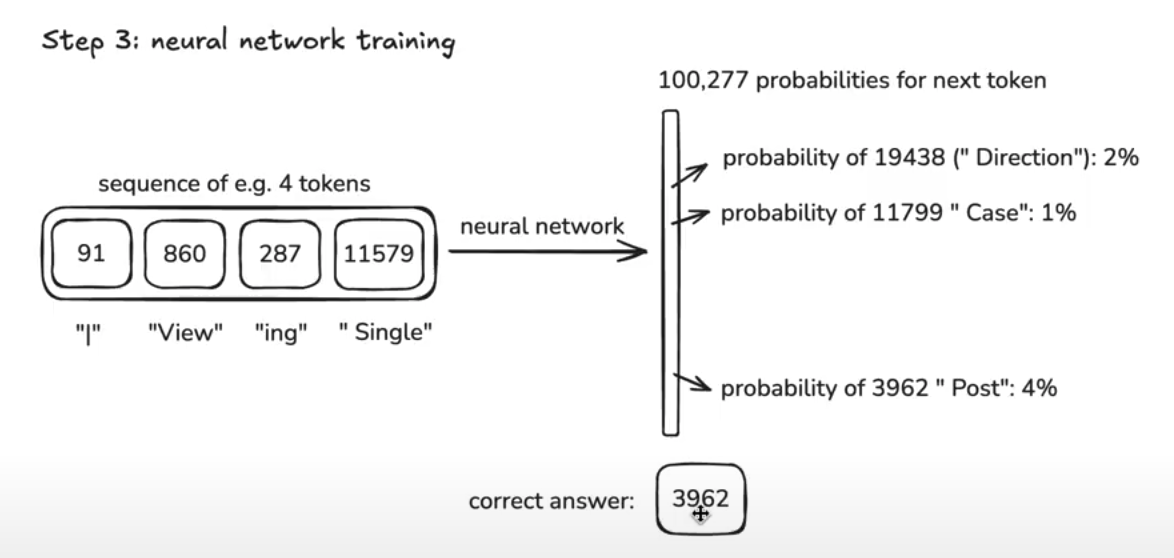



이러한 다음 토큰 예측하는 프로세스는 개별로 일어나지 않고, 이 데이터셋 전체에서 병렬로 일어나게 됨.
<p> 
이 과정을 거치면서, 신경망을 구성하는 파라미터들이 이 학습 데이터셋에서의 토큰들의 확률분포에 맞게 조금씩 업데이트됨.

# 4. Neural Network Internals

좌측 상단 토큰은 윈도우 사이즈 8000개의 인풋을 의미.
좌측 하단의 가중치는 보통 수십억개의 파라미터에 해당하고,
이것이 거대한 수학식을 거치면서 100,277개의 토큰에 대해서 예측값을 뱉어내게 됨.

위에서 언급한 것처럼, 최초에는 랜덤하게 예측을 하지만, 해당 트레이닝셋에 대한 학습 과정을 거치면서, 좌측 하단의 가중치값들이 흡사 DJ들이 조금씩 knob을 돌려가면서 튜닝하는 것과 같은 과정을 거침으로써,
이 학습데이터에서부터 비롯된 8000토큰 인풋에 대한 100,277개의 토큰별 대한 예측값은 점차 "consistent _일정해지는" 경향을 보이게 된다...!

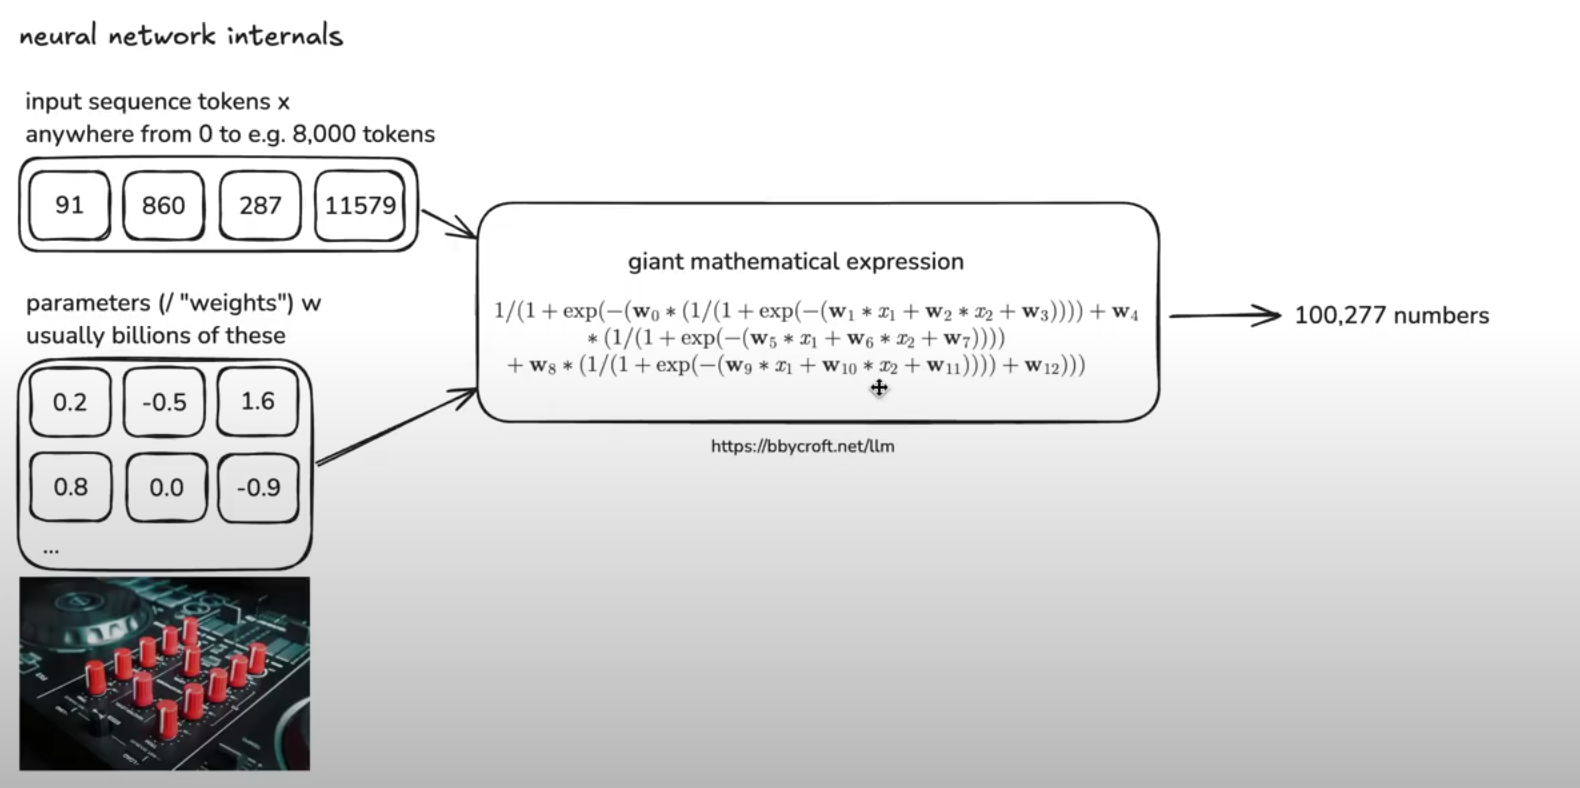

거대한 수학식은 곱셈, 덧셈, 지수함수와 같은 기본적인 연산으로 구성됨

거대 수학식에 대해서 시각화를 아주 잘 한 사이트 : https://bbycroft.net/llm

. 이 네트워크는 TRANSFORMER!라고 불리우며,
. 이 nano-gpt는 85,584개의 파라미터로 구성된 예시.
. 맨 위 인풋 (토큰 시퀀스)에 대해서 인풋에 대한 임베딩 벡터로 변환되고, 중간에 수많은 덧셈과 곱셈과 지수함수 등을 거치며, 가장 아래에 아웃풋으로 다음 토큰값에 대한 예측값(이경우 logit softmax 함수)을 출력
. 중간 연산 과정들을 모두 neuron이라고 볼 수 있지만, biological neuron은 memory가 있는데에 반해, 이 transformer는 memory가 없는 stateless한 processor임. 따라서, 실험실의 합성신경망 수준으로만 생각하는 것이 좋겠음.
key takeaway : 이것은 수많은 매개변수에 대한 거대한 수학연산이고, 그 매개변수들을 계속 조정해나가면서 이 학습데이터에 있는 패턴을 학습해내가는 과정이라는 것을 이해하면 됨.

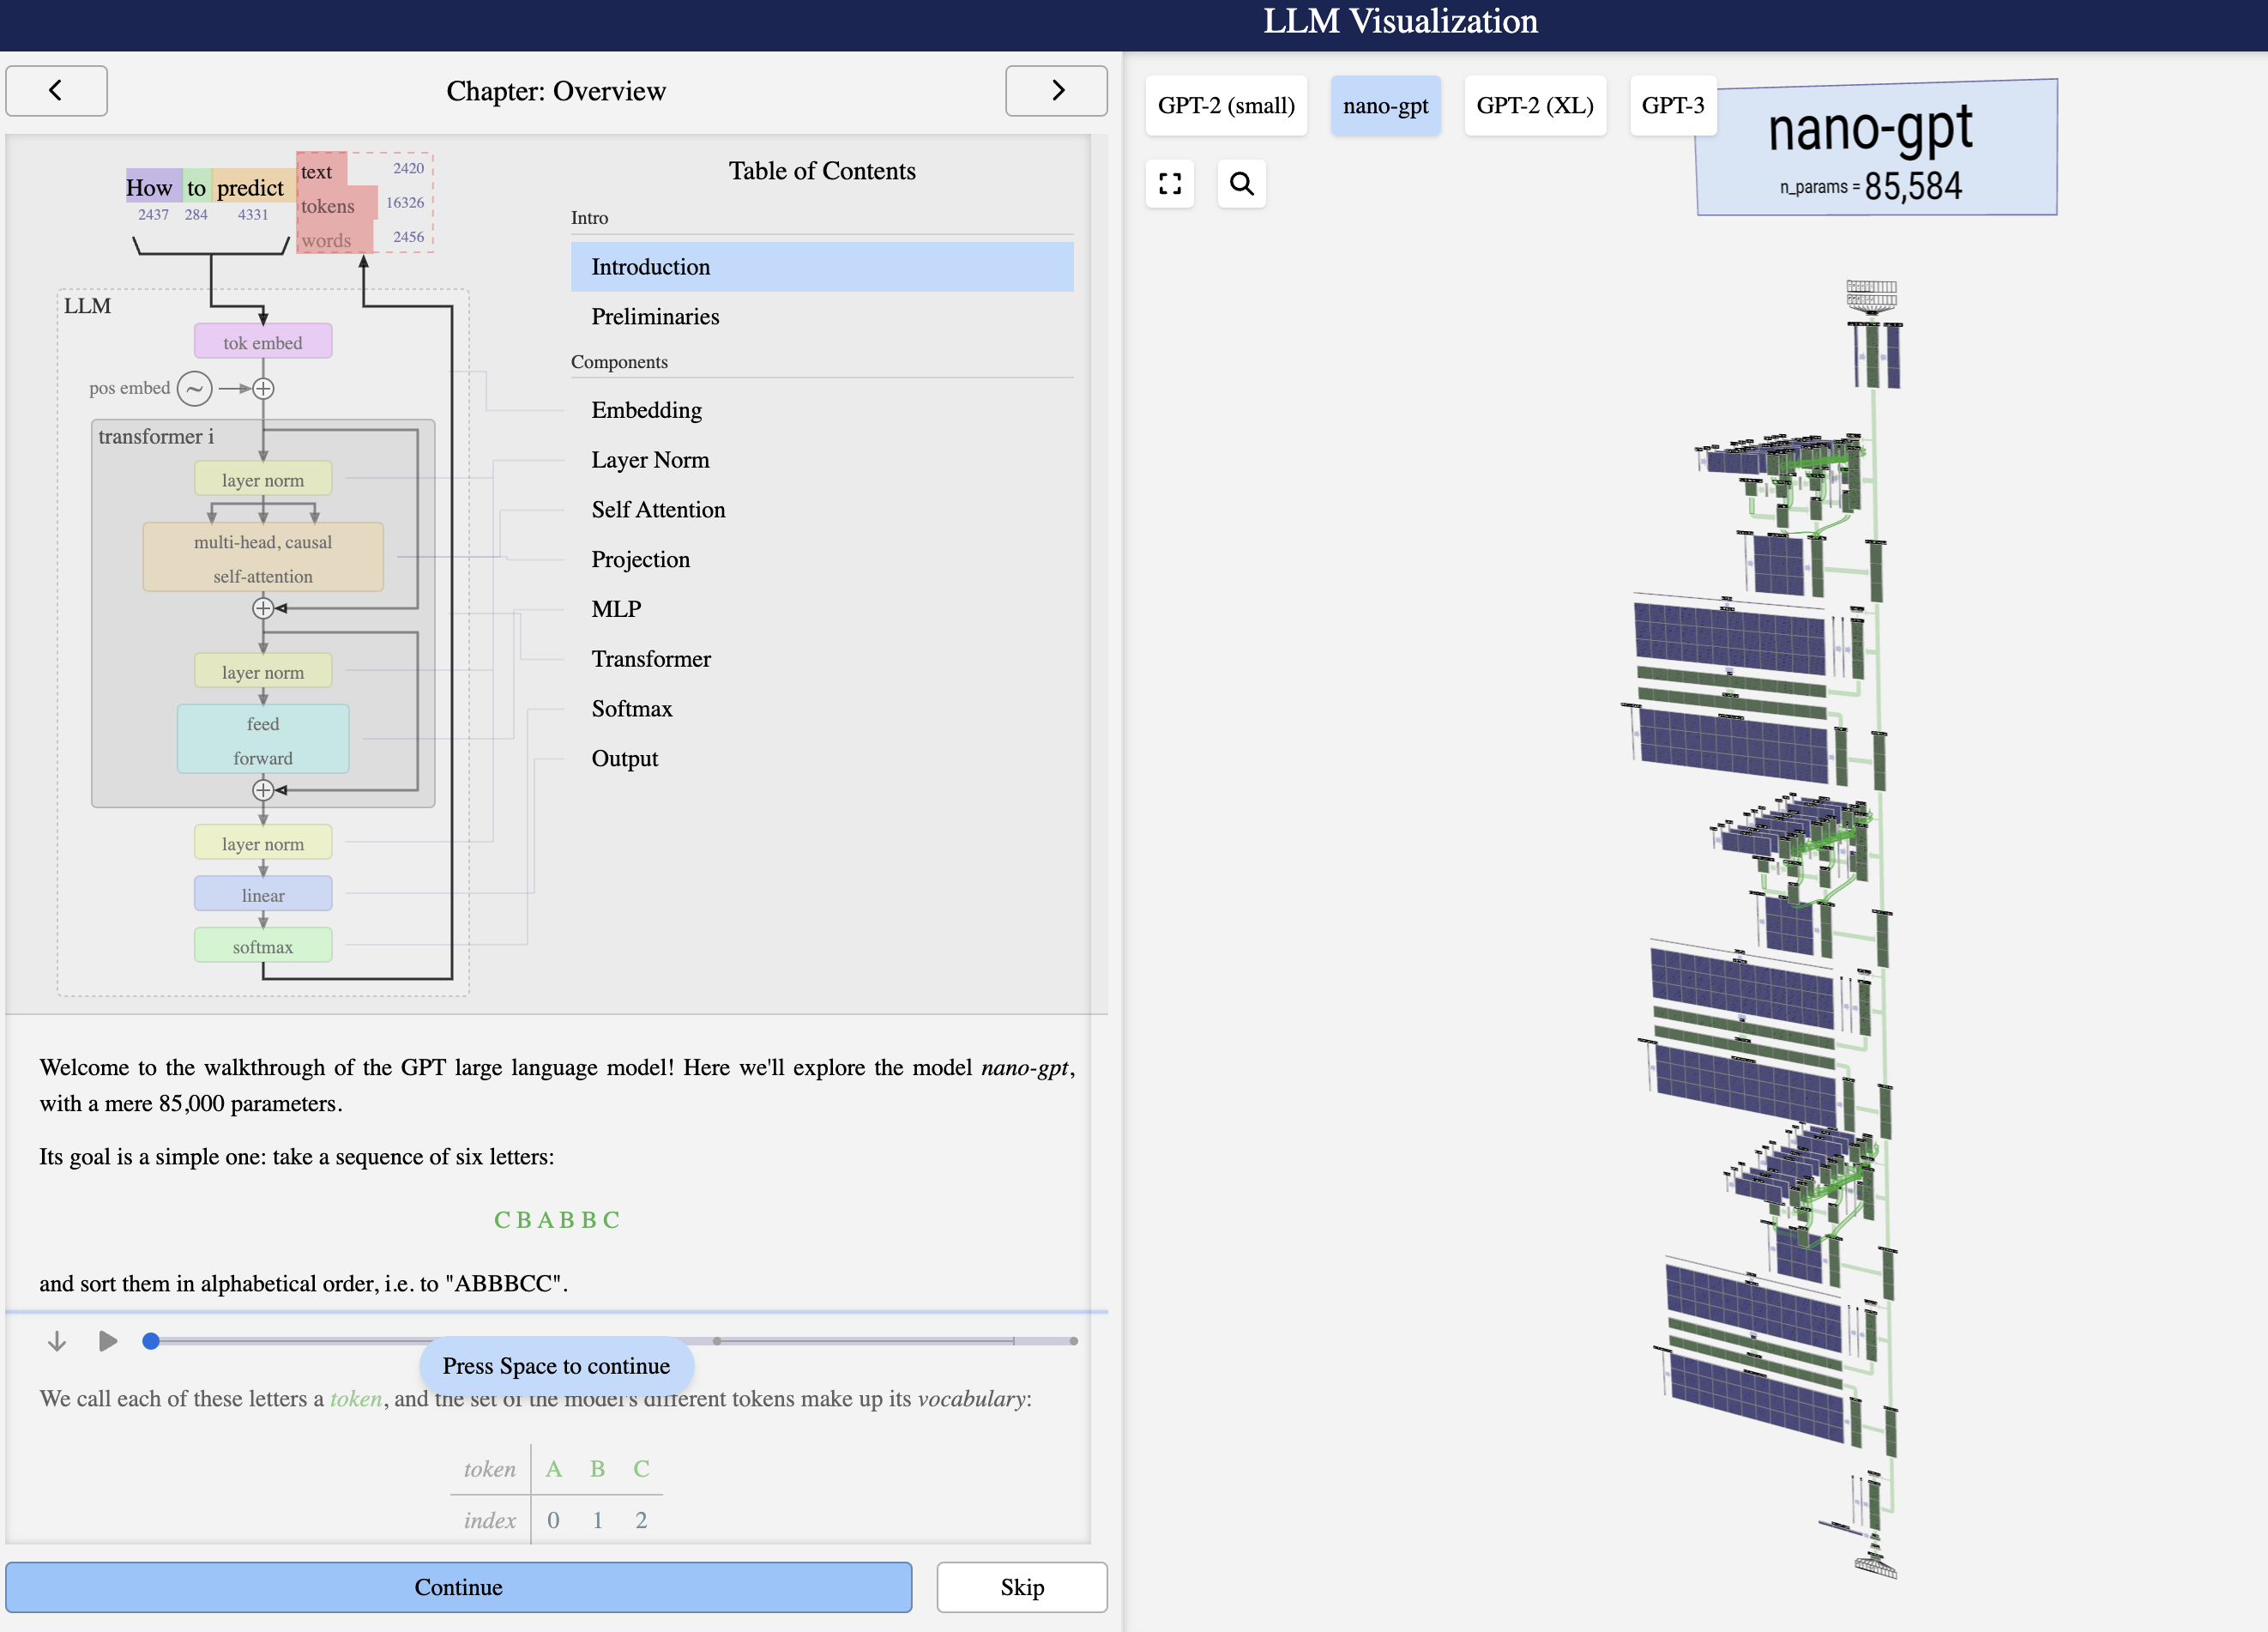

# 5. Inference

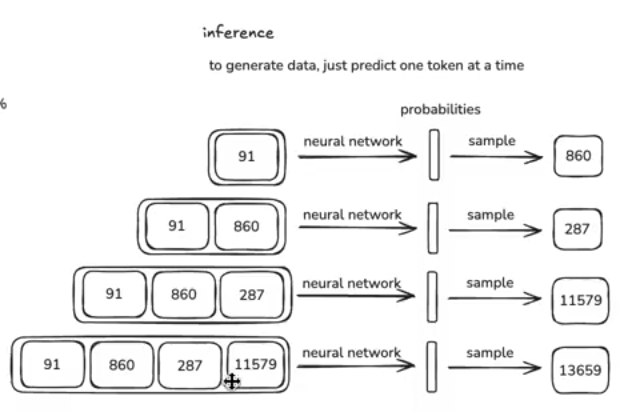

위와 같이 모델이 학습되었다면, 이 모델을 활용 (inference)하는 단계로 넘어갈 수 있음.

91이라는 토큰에서 시작해서, 다음에 올 토큰 860을 예측하고,
이것이 다시 인풋으로 들어간 다음에 91 870, 다음 토큰으로 287을 예측한다.

이 과정이 반복되고, 이를 inference라 부름 (* autoregression이라고 부르는 과정) 